# 🏠 Análisis de datos inmobiliarios

Por Coke y Alejandro

Este cuaderno analiza un conjunto de datos inmobiliarios, explora estadísticas univariables y bivariables, realiza pruebas de normalidad, estima parámetros de población y realiza estadísticas inferenciales, incluidas pruebas de hipótesis y ANOVA.

Dataset: [Datos inmobiliarios de Londres 2024](https://www.kaggle.com/datasets/kanchana1990/real-estate-data-london-2024).

Fuente: [Kaggle](https://www.kaggle.com/).

Origen de los datos: [Rightmove](https://www.rightmove.co.uk/), Noviembre de 2024.

### 🗂️ **Dependencias**

In [191]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib as plt
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

import scipy
import scipy.stats as st
from scipy import stats
import scipy.stats as stats
from scipy.stats import skew
import nbformat




## ⚙️ **Configuración Inicial**

* Carga previa de data.csv en la raíz de Archivos.
* Exploración inicial
* Limpieza del dataset
* Generación de subconjunto
* Inspección de outliers


### 📥 Importación de Datos

Importación con Pandas y asignación a la variable **data**.

In [122]:
data = pd.read_csv("data/data.csv")

### 🔍 Exploración Inicial

* Vista previa
* Informe Y Data
* Informe Sweetviz

Iofrmación y muestra de cabecera del dataset para obtener una idea aproximada de los datos disponibles.

In [123]:
data.describe()

,sizeSqFeetMax,bedrooms,bathrooms
count,869.000000,1003.000000,984.000000
mean,5232.871116,5.111665,4.648374
std,11796.770144,3.264992,3.085809
min,425.000000,1.000000,1.000000
25%,2885.000000,3.000000,3.000000
50%,3834.000000,5.000000,4.000000
75%,5745.000000,6.000000,5.000000
max,336989.000000,66.000000,66.000000


In [124]:
data.head()

,addedOn,title,descriptionHtml,propertyType,sizeSqFeetMax,bedrooms,bathrooms,listingUpdateReason,price
0,10/10/2024,"8 bedroom house for sale in Winnington Road, H...","This magnificent home, set behind security gat...",House,16749.0,8.0,8.0,new,"£24,950,000"
1,Reduced on 24/10/2024,"7 bedroom house for sale in Brick Street, Mayf...","In the heart of exclusive Mayfair, this majest...",House,12960.0,7.0,7.0,price_reduced,"£29,500,000"
2,Reduced on 22/02/2024,6 bedroom terraced house for sale in Chester S...,A freehold home that gives you everything you ...,Terraced,6952.0,6.0,6.0,price_reduced,"£25,000,000"
3,08/04/2024,6 bedroom detached house for sale in Winningto...,A magnificent bespoke residence set behind sec...,Detached,16749.0,6.0,6.0,new,"£24,950,000"
4,Reduced on 11/07/2023,8 bedroom detached house for sale in St. John'...,"With its village like ambiance, elegant regenc...",Detached,10241.0,8.0,10.0,price_reduced,"£24,950,000"


### ✨ Limpieza del dataset

* Entradas `NaN` y duplicadas descartadas (2.3%)
* Columnas innecesarias descartadas (3)
* Columna `title` reformateada a `ZIP`
* Formateo columna `price`
* Creación de columna `pricePerSqFoot`

#### ⛔️ Entradas NaN y duplicadas

Se descartan las filas que contengan algún valor NaN y las duplicadas ya que no representan un porcentaje significativo de la muestra.

* 20 entradas de 869
* 2.3%

In [125]:
data=data.dropna()
data=data.drop_duplicates().reset_index(drop=True)

In [126]:
data

,addedOn,title,descriptionHtml,propertyType,sizeSqFeetMax,bedrooms,bathrooms,listingUpdateReason,price
0,10/10/2024,"8 bedroom house for sale in Winnington Road, H...","This magnificent home, set behind security gat...",House,16749.0,8.0,8.0,new,"£24,950,000"
1,Reduced on 24/10/2024,"7 bedroom house for sale in Brick Street, Mayf...","In the heart of exclusive Mayfair, this majest...",House,12960.0,7.0,7.0,price_reduced,"£29,500,000"
2,Reduced on 22/02/2024,6 bedroom terraced house for sale in Chester S...,A freehold home that gives you everything you ...,Terraced,6952.0,6.0,6.0,price_reduced,"£25,000,000"
3,08/04/2024,6 bedroom detached house for sale in Winningto...,A magnificent bespoke residence set behind sec...,Detached,16749.0,6.0,6.0,new,"£24,950,000"
4,Reduced on 11/07/2023,8 bedroom detached house for sale in St. John'...,"With its village like ambiance, elegant regenc...",Detached,10241.0,8.0,10.0,price_reduced,"£24,950,000"
...,...,...,...,...,...,...,...,...,...
844,04/06/2024,7 bedroom semi-detached house for sale in Lyfo...,"This spectacular seven bedroom, semi-detached,...",Semi-Detached,7454.0,7.0,4.0,new,"£6,500,000"
845,04/06/2024,7 bedroom semi-detached house for sale in Lyfo...,An exquisite seven bedroom house offering luxu...,Semi-Detached,7454.0,7.0,5.0,new,"£6,500,000"
846,Added today,3 bedroom apartment for sale in Battersea Powe...,NO STAMP DUTY This stunning penthouse apartmen...,Apartment,2601.0,3.0,4.0,new,"£6,500,000"
847,28/08/2024,"3 bedroom apartment for sale in Vicarage Gate,...","Welcome to 2 Vicarage Gate House, a sophistica...",Apartment,2508.0,3.0,3.0,new,"£6,500,000"


#### ⛔️ Columnas innecesarias

Se eliminan las columnas innecesarias:


*   addedOn: No importa en qué fecha se añadió.
*   descriptionHtml: La descripción detallada no aporta información útil para el análisis.
*   listingUpdateReason: El motivo por el que está en la lista tampoco interesa en este caso.




In [127]:
data = data.drop(columns=["addedOn", "descriptionHtml", "listingUpdateReason"])

#### 💄 Columna ZIP

De la columna "title" se extrae "Location" y a su vez, de "Location" obtenemos el "ZIP".

A continuación se eliminan ambas columnas y conservamos únicamente el "ZIP"

In [128]:
data["Location"] = data["title"].str.split("in ", n=1).str[1]
data["ZIP"] = data["Location"].str.split(", ").str[-1]

In [129]:
data=data.drop(["Location","title"], axis=1)

#### 💄 Columna price

Formateo de la columna "price" para quitar símbolos y convertirla en numérica.

In [130]:
data["price"] = pd.to_numeric(data["price"].str.replace('£', '', regex=False).str.replace(',', '', regex=False), errors='coerce')

Además, reduciremos el precio en mil libras para facilitar la visualización

In [131]:
data["price(M)"] = data["price"] / 1000000
data=data.drop("price", axis=1)

#### ✅ Columna pricePerSqFoot

In [132]:
data["pricePerSqFoot(k)"] = round((data["price(M)"] * 1000) / data["sizeSqFeetMax"], 2)

#### 👀 Comprobación

Comprobación de la nueva columna "ZIP" y del formato de "price"

In [133]:
data.head()

,propertyType,sizeSqFeetMax,bedrooms,bathrooms,ZIP,price(M),pricePerSqFoot(k)
0,House,16749.0,8.0,8.0,N2,24.95,1.49
1,House,12960.0,7.0,7.0,W1J,29.50,2.28
2,Terraced,6952.0,6.0,6.0,SW1W,25.00,3.60
3,Detached,16749.0,6.0,6.0,N2,24.95,1.49
4,Detached,10241.0,8.0,10.0,NW8,24.95,2.44


In [134]:
data.describe()

,sizeSqFeetMax,bedrooms,bathrooms,price(M),pricePerSqFoot(k)
count,849.000000,849.000000,849.000000,849.000000,849.000000
mean,5122.775029,4.963486,4.584217,11.333114,2.765630
std,11850.272127,2.461464,2.277926,6.757395,1.453578
min,425.000000,1.000000,1.000000,0.475000,0.030000
25%,2885.000000,3.000000,3.000000,7.500000,1.940000
50%,3794.000000,5.000000,4.000000,9.250000,2.550000
75%,5624.000000,6.000000,5.000000,13.000000,3.360000
max,336989.000000,36.000000,34.000000,80.000000,19.780000


### 📚 Subconjunto

* Creación de columna `propertyGlobalType`
* Creación de tipos globales `House` y `Flat`
* Creación de subset `subset`


Con el objetivo de sacar conclusiones sobre los tipos de inmuebles generamos 2 tipos globales agrupando 3 tipos de propiedad cada uno:
* House
  * House
  * Detached
  * Terraced
* Flat
  * Flat
  * Apartment
  * Penthouse

In [135]:
data['propertyGlobalType']= np.where(data['propertyType'].isin(['Apartment', 'Penthouse', 'Flat']), 'Flat',
    np.where(data['propertyType'].isin(['House', 'Terraced', 'Detached']),'House',None))

In [136]:
subset = data[data['propertyGlobalType'].notna()]
subset = subset[["ZIP","propertyType","propertyGlobalType","bedrooms","bathrooms","sizeSqFeetMax","pricePerSqFoot(k)","price(M)"]]

In [137]:
subset.head()

,ZIP,propertyType,propertyGlobalType,bedrooms,bathrooms,sizeSqFeetMax,pricePerSqFoot(k),price(M)
0,N2,House,House,8.0,8.0,16749.0,1.49,24.95
1,W1J,House,House,7.0,7.0,12960.0,2.28,29.50
2,SW1W,Terraced,House,6.0,6.0,6952.0,3.60,25.00
3,N2,Detached,House,6.0,6.0,16749.0,1.49,24.95
4,NW8,Detached,House,8.0,10.0,10241.0,2.44,24.95


### 🏴‍☠️ Outliers

Por defecto procedemos a descartar outliers que podrían complicar las predicciones:

* Top 3 por tamaño, descartados.
* Más de 15 baños o habitaciones, descartados.

In [138]:
subset_by_sizeSqFeetMax = subset.sort_values(by='sizeSqFeetMax', ascending=False)
subset_by_sizeSqFeetMax.head(10)

,ZIP,propertyType,propertyGlobalType,bedrooms,bathrooms,sizeSqFeetMax,pricePerSqFoot(k),price(M)
426,SW8,Penthouse,Flat,5.0,4.0,336989.0,0.03,9.60
813,SW10,Apartment,Flat,4.0,4.0,36909.0,0.18,6.50
203,N2,Detached,House,8.0,8.0,31376.0,0.40,12.50
39,W1B,Terraced,House,10.0,10.0,20987.0,3.10,65.00
24,TW1,Detached,House,9.0,12.0,18837.0,1.59,29.95
30,N6,Detached,House,10.0,9.0,18238.0,1.75,32.00
3,N2,Detached,House,6.0,6.0,16749.0,1.49,24.95
0,N2,House,House,8.0,8.0,16749.0,1.49,24.95
77,N2,Detached,House,6.0,9.0,16748.0,1.49,24.95
34,SW1E,Terraced,House,9.0,9.0,15845.0,2.84,45.00


Descartamos las tres primeras propiedades con más tamaño.

In [139]:
subset = subset.drop(index=[426, 813, 203])

In [140]:
subset_by_sizeSqFeetMax = subset.sort_values(by='sizeSqFeetMax', ascending=True)
subset_by_sizeSqFeetMax.head(10)

,ZIP,propertyType,propertyGlobalType,bedrooms,bathrooms,sizeSqFeetMax,pricePerSqFoot(k),price(M)
808,N5,Apartment,Flat,1.0,1.0,425.0,1.29,0.550
428,SW8,Penthouse,Flat,5.0,4.0,593.0,16.19,9.600
602,NW6,Apartment,Flat,2.0,1.0,642.0,1.17,0.750
592,W2,Apartment,Flat,1.0,1.0,696.0,1.51,1.050
302,E14,Flat,Flat,2.0,2.0,734.0,0.85,0.625
575,SE8,Apartment,Flat,2.0,2.0,871.0,0.63,0.550
834,SW8,Penthouse,Flat,5.0,4.0,872.0,7.45,6.500
135,N10,Apartment,Flat,2.0,1.0,900.0,0.81,0.725
344,SW17,House,House,3.0,1.0,911.0,0.87,0.795
345,E14,Flat,Flat,2.0,2.0,915.0,0.57,0.525




---



In [141]:
subset_by_bedrooms = subset.sort_values(by=['bedrooms',"bathrooms"], ascending=False)
subset_by_bedrooms.head(10)

,ZIP,propertyType,propertyGlobalType,bedrooms,bathrooms,sizeSqFeetMax,pricePerSqFoot(k),price(M)
714,SE18,Apartment,Flat,30.0,30.0,13096.0,0.55,7.200
46,W8,House,House,29.0,19.0,11238.0,1.65,18.500
44,W8,Terraced,House,14.0,20.0,12575.0,1.47,18.500
590,NW2,House,House,13.0,11.0,10192.0,0.78,8.000
589,NW2,Detached,House,13.0,10.0,10127.0,0.79,8.000
381,SW7,House,House,12.0,8.0,8791.0,1.13,9.975
102,W14,Detached,House,12.0,6.0,6497.0,2.69,17.500
724,W1U,Terraced,House,12.0,3.0,8793.0,0.80,7.000
131,NW3,Detached,House,11.0,9.0,6071.0,2.79,16.950
651,SW19,Detached,House,11.0,6.0,5680.0,1.32,7.495


Descartamos aquellas propiedades con más de 15 baños o más de 15 habitaciones.

In [142]:
subset = subset.drop(index=[714, 46, 44])



---



In [143]:
subset_by_pricePerSqFoot = subset.sort_values(by='pricePerSqFoot(k)', ascending=False)
subset_by_pricePerSqFoot.head(5)

,ZIP,propertyType,propertyGlobalType,bedrooms,bathrooms,sizeSqFeetMax,pricePerSqFoot(k),price(M)
428,SW8,Penthouse,Flat,5.0,4.0,593.0,16.19,9.60
455,W1K,Penthouse,Flat,5.0,2.0,1055.0,8.48,8.95
40,SW7,Penthouse,Flat,5.0,5.0,9437.0,8.48,80.00
188,W1U,Apartment,Flat,3.0,3.0,1959.0,7.63,14.95
662,SW1X,Flat,Flat,1.0,2.0,990.0,7.58,7.50


In [144]:
subset_SW8= subset[subset['ZIP']=="SW8"]
subset_by_pricePerSqFoot = subset_SW8.sort_values(by='pricePerSqFoot(k)', ascending=False)
subset_by_pricePerSqFoot.head(3)

,ZIP,propertyType,propertyGlobalType,bedrooms,bathrooms,sizeSqFeetMax,pricePerSqFoot(k),price(M)
428,SW8,Penthouse,Flat,5.0,4.0,593.0,16.19,9.600
834,SW8,Penthouse,Flat,5.0,4.0,872.0,7.45,6.500
342,SW8,Apartment,Flat,5.0,6.0,3114.0,3.45,10.747


Descartamos una propiedad que duplica a la segunda con el precio por pie cuadrado más elevado.

In [145]:
subset = subset.drop(index=428)

In [146]:
subset_by_pricePerSqFoot = subset.sort_values(by='pricePerSqFoot(k)', ascending=False)
subset_by_pricePerSqFoot.tail(10)

,ZIP,propertyType,propertyGlobalType,bedrooms,bathrooms,sizeSqFeetMax,pricePerSqFoot(k),price(M)
679,N21,Detached,House,6.0,6.0,12500.0,0.60,7.500
611,N21,Detached,House,6.0,6.0,12500.0,0.60,7.500
477,E16,Flat,Flat,2.0,2.0,992.0,0.58,0.575
491,N2,Detached,House,8.0,7.0,14999.0,0.58,8.750
345,E14,Flat,Flat,2.0,2.0,915.0,0.57,0.525
534,N20,Flat,Flat,3.0,2.0,1231.0,0.56,0.695
698,N1,House,House,6.0,6.0,12809.0,0.54,6.950
499,NW4,Flat,Flat,2.0,1.0,1012.0,0.47,0.475
785,N21,Detached,House,5.0,3.0,2565.0,0.47,1.200
843,N2,Detached,House,6.0,10.0,14770.0,0.44,6.500


In [147]:
subset_by_price = subset.sort_values(by='price(M)', ascending=False)
subset_by_price

,ZIP,propertyType,propertyGlobalType,bedrooms,bathrooms,sizeSqFeetMax,pricePerSqFoot(k),price(M)
40,SW7,Penthouse,Flat,5.0,5.0,9437.0,8.48,80.000
39,W1B,Terraced,House,10.0,10.0,20987.0,3.10,65.000
37,SW1W,House,House,6.0,6.0,13067.0,3.60,47.000
34,SW1E,Terraced,House,9.0,9.0,15845.0,2.84,45.000
33,SW1X,Terraced,House,8.0,8.0,9049.0,4.20,38.000
...,...,...,...,...,...,...,...,...
477,E16,Flat,Flat,2.0,2.0,992.0,0.58,0.575
808,N5,Apartment,Flat,1.0,1.0,425.0,1.29,0.550
575,SE8,Apartment,Flat,2.0,2.0,871.0,0.63,0.550
345,E14,Flat,Flat,2.0,2.0,915.0,0.57,0.525


Descartamos el inmueble con el precio más elevado, que marca más del doble del siguiente de su tipo global.

In [148]:
subset = subset.drop(index=40)

## 💾 Descarga de subset

Innecesario si se ejecuta toda la sesión.

In [149]:
subset.to_csv('data/subset.csv', index=False)

## 📤 Recarga de subset

Innecesario si se ejecuta toda la sesión.

In [150]:
subset = pd.read_csv("data/subset.csv")

## 📊 **Descripción de Variables y analisis univariante**

Además de comprobar la normalidad de las variables en las que sea posible.

### Cuantitativas

No presentan distribución normal.

#### **sizeSqFeetMax**

* Descripción: Área del inmueble en pies cuadrados.
* Tipo de variable: Cuantitativa continua.
* Normalidad: No (F de Fisher-Snedecor?)

In [151]:
subset["sizeSqFeetMax"].describe()


count      735.000000
mean      4559.235374
std       2845.480646
min        425.000000
25%       2851.000000
50%       3686.000000
75%       5518.500000
max      20987.000000
Name: sizeSqFeetMax, dtype: float64

In [152]:
fig = px.histogram(
    subset, 
    x="sizeSqFeetMax", 
    nbins=100, 
    title="Distribución por área",
)

mean_value = subset["sizeSqFeetMax"].mean()
median_value = subset["sizeSqFeetMax"].median()

fig.add_vline(
    x=mean_value, 
    line=dict(color='black', dash='dash'), 
    annotation_text="Mean", 
    annotation_position="top right"
)
fig.add_vline(
    x=median_value, 
    line=dict(color='red', dash='dash'), 
    annotation_text="Median", 
    annotation_position="top left"
)

# Show the legend
fig.update_layout(legend_title_text="Metrics")
fig.show()


Dada la diferencia entre media y mediana de aprocximadamente 1300 pies y la forma de la distribución, se concluye que la distribución de sizeSqFeetMax no es normal.

Podría tratarse de una Distribución F de Fisher-Snedecor.

In [153]:
Size=subset["sizeSqFeetMax"]
print("Asimetria: "+ str(skew(Size, axis=0, bias=True)))
print("Curtosis: "+ str(stats.kurtosis(Size, axis=0, fisher=True, bias=True)))

Asimetria: 1.9733182365290558
Curtosis: 5.1703746104766015


La asimetría a la izquierda ya era bastante apreciable aunque la curtosis es más alta de lo esperado. A pesar de ello, su cercanía al 0 indica parecido con una distribución normal.

#### **price**

* Descripción: Precio del inmueble en libras.
* Tipo de variable: Cuantitativa continua.
* Normalidad: No (F de Fisher-Snedecor?)


In [154]:
subset["price(M)"].describe()


count    735.000000
mean      10.958573
std        5.942697
min        0.475000
25%        7.500000
50%        9.000000
75%       12.850000
max       65.000000
Name: price(M), dtype: float64

In [155]:
fig = px.histogram(
    subset, 
    x="price(M)", 
    nbins=100, 
    title="Distribución por precio",
)

mean_value = subset["price(M)"].mean()
median_value = subset["price(M)"].median()

fig.add_vline(
    x=mean_value, 
    line=dict(color='black', dash='dash'), 
    annotation_text="Mean", 
    annotation_position="top right"
)
fig.add_vline(
    x=median_value, 
    line=dict(color='red', dash='dash'), 
    annotation_text="Median", 
    annotation_position="top left"
)

# Show the legend
fig.update_layout(legend_title_text="Metrics")
fig.show()


A pesar de tener un suelo en 6.5M, la distribucion es muy similar a `sizeSqFeetMax`, se concluye que la distribución de sizeSqFeetMax no es normal.


In [156]:
price=subset["price(M)"]
print("Asimetria: "+ str(skew(price, axis=0, bias=True)))
print("Curtosis: "+ str(stats.kurtosis(price, axis=0, fisher=True, bias=True)))

Asimetria: 2.66270019990273
Curtosis: 13.484118324222077


La asimetría y no normalidad ya eran extremadamente obras antes del test por lo que no indagaremos en estos resultados, más allá de destacar lo alto que es el valor de curtosis.

#### **pricePerSqFoot**

* Descripción: Precio del pie cuadrado.
* Tipo de variable: Cuantitativa continua.
* Normalidad: No (F de Fisher-Snedecor?)



In [157]:
subset["pricePerSqFoot(k)"].describe()


count    735.000000
mean       2.757374
std        1.257427
min        0.440000
25%        1.945000
50%        2.570000
75%        3.385000
max        8.480000
Name: pricePerSqFoot(k), dtype: float64

In [169]:
fig = px.histogram(
    subset, 
    x="pricePerSqFoot(k)", 
    nbins=40, 
    title="Distribución por precio",
)

mean_value = subset["pricePerSqFoot(k)"].mean()
median_value = subset["pricePerSqFoot(k)"].median()

fig.add_vline(
    x=mean_value, 
    line=dict(color='black', dash='dash'), 
    annotation_text="Mean", 
    annotation_position="top right"
)
fig.add_vline(
    x=median_value, 
    line=dict(color='red', dash='dash'), 
    annotation_text="Median", 
    annotation_position="top left"
)

# Show the legend
fig.update_layout(legend_title_text="Metrics")
fig.show()


En este caso la media y la mediana están relativamente cerca una de otra y la cola es lo bastante pequeña como para causar dudas sobre su normalidad.

In [170]:
PpF=subset["pricePerSqFoot(k)"]
print("Asimetria: "+ str(skew(PpF, axis=0, bias=True)))
print("Curtosis: "+ str(stats.kurtosis(PpF, axis=0, fisher=True, bias=True)))

Asimetria: 1.0625133634495507
Curtosis: 1.8818854050464422


La asimetría es más alta de o esperado, pero comprensible puesto que esta variable está directamente relacionada con `price`. Por otro lado, la curtosis es la más pequeña hasta ahora.

#### **bedrooms**

* Descripción: Número de habitaciones.
* Tipo de variable: Cuantitativa discreta.
* Normalidad: No


In [178]:
# Prepare data for the countplot
bedroom_counts = subset["bedrooms"].value_counts().reset_index()
bedroom_counts.columns = ["bedrooms", "count"]  # Rename columns

# Create a bar plot
fig = px.bar(
    bedroom_counts,
    x="bedrooms",             # Unique bedroom values
    y="count",                # Corresponding counts
    title="Distribución por número de habitaciones",
    labels={"bedrooms": "Number of Bedrooms", "count": "Count"}
)

# Calculate mean and median for the number of bedrooms
mean_value = subset["bedrooms"].mean()
median_value = subset["bedrooms"].median()

# Add vertical lines for mean and median
fig.add_vline(
    x=mean_value, 
    line=dict(color='black', dash='dash'), 
    annotation_text="Mean", 
    annotation_position="top right"
)
fig.add_vline(
    x=median_value, 
    line=dict(color='red', dash='dash'), 
    annotation_text="Median", 
    annotation_position="top left"
)

# Update layout to refine appearance
fig.update_layout(
    xaxis_title="Number of Bedrooms",
    yaxis_title="Count",
    legend_title_text="Metrics"
)

# Show the figure
fig.show()


#### **bathrooms**

* Descripción: Número de baños.
* Tipo de variable: Cuantitativa discreta.
* Normalidad: No

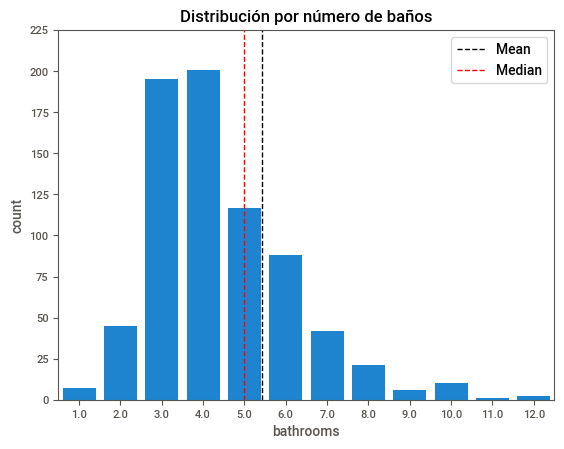

In [ ]:
sns.countplot(data=subset, x="bathrooms")
plt.title('Distribución por número de baños')
plt.axvline(subset["bathrooms"].mean(), color='k', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(subset["bathrooms"].median(), color='r', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.ylim(0, 225)
plt.show()


### Categóricas

#### **ZIP**

*   Descripción: Código postal.
*   Tipo de variable: Categórica nominativa.

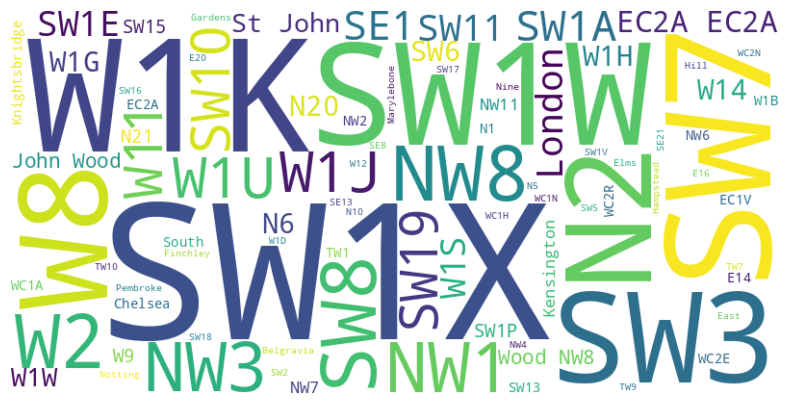

In [ ]:
zip_text = " ".join(subset["ZIP"].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(zip_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


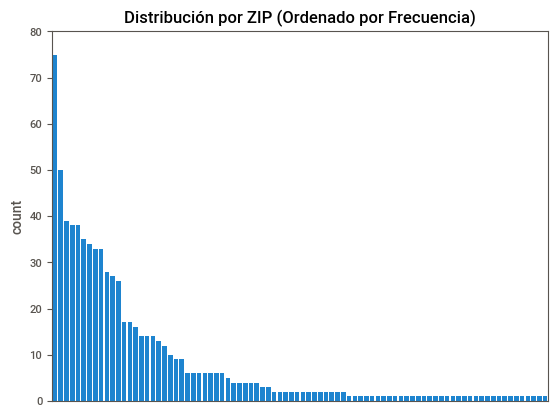

In [ ]:
zip_order = subset["ZIP"].value_counts().index

sns.countplot(data=subset, x="ZIP", order=zip_order)
plt.title('Distribución por ZIP (Ordenado por Frecuencia)')
plt.ylim(0, 80)
plt.xlabel('')
plt.xticks([])
plt.show()

#### **propertyType**

*   Descripción: Tipo de propiedad.

  *   Apartment
  *   Penthouse
  *   Flat
  *   House
  *   Terraced
  *   Detached

*   Tipo de variable: Categórica nominativa.

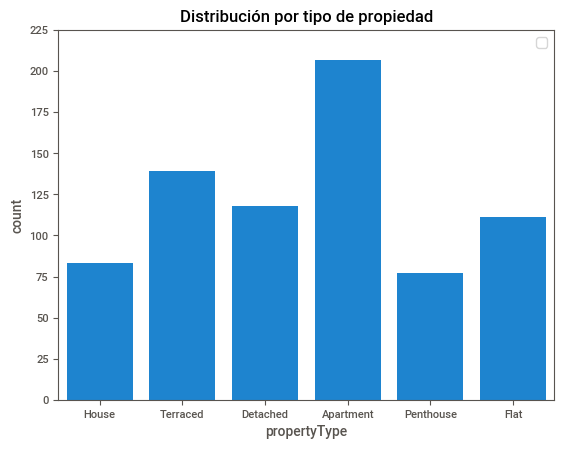

In [ ]:
sns.countplot(data=subset, x="propertyType")
plt.title('Distribución por tipo de propiedad')
plt.legend()
plt.ylim(0, 225)
plt.show()


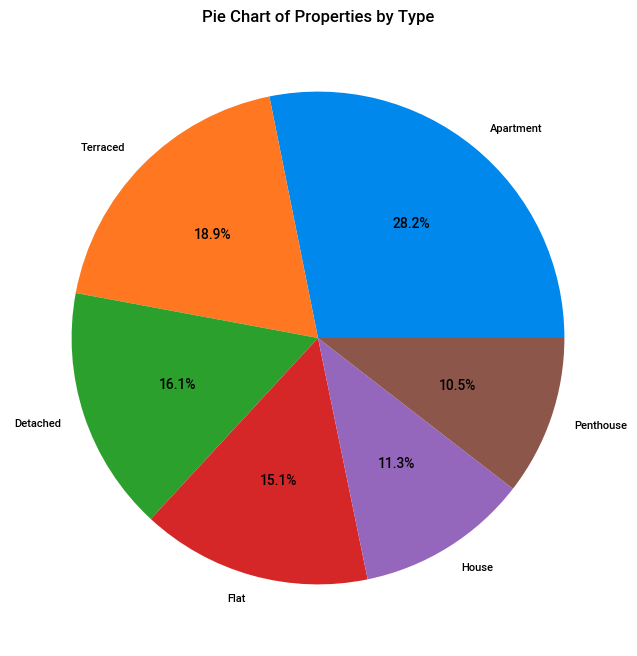

In [ ]:
# Group by propertyType and count the number of properties
properties_by_type = subset['propertyType'].value_counts()

# Plot the pie chart
properties_by_type.plot(
    kind='pie',
    title='Pie Chart of Properties by Type',
    autopct='%1.1f%%',  # Display percentages
    figsize=(8, 8)  # Optional: adjust figure size
)

# Show the plot
plt.ylabel('')  # Remove the default y-label for a cleaner look
plt.show()

#### **propertyGlobalType**

*   Descripción: Tipo de propiedad principal.

  *   House
  *   Flat

*   Tipo de variable: Categórica nominativa.

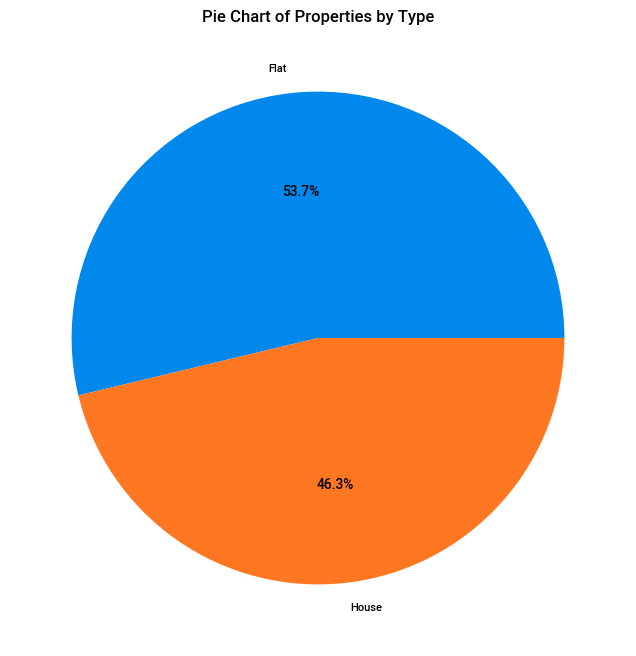

In [ ]:
# Group by propertyType and count the number of properties
properties_by_type = subset['propertyGlobalType'].value_counts()

# Plot the pie chart
properties_by_type.plot(
    kind='pie',
    title='Pie Chart of Properties by Type',
    autopct='%1.1f%%',  # Display percentages
    figsize=(8, 8)  # Optional: adjust figure size
)

# Show the plot
plt.ylabel('')  # Remove the default y-label for a cleaner look
plt.show()

## 📈 Analisis Bivariante

In [182]:
fig = px.scatter(subset, y="price(M)", x="sizeSqFeetMax", color="propertyType")
fig.show()

In [183]:
fig = px.scatter(subset, y="price(M)", x="sizeSqFeetMax", color="ZIP")
fig.show()

In [184]:
fig = px.histogram(
    data_frame=subset,
    x='price(M)',
    color='propertyGlobalType',
    nbins=30,  # Number of bins
    title='Distribution of Property Prices by Global Type',
    labels={'price(M)': 'Price (in millions)', 'propertyGlobalType': 'Property Global Type'},
    barmode='stack',  # Change to 'group' for side-by-side bars
    template='plotly',  # Optional: for aesthetic improvements
    color_discrete_sequence=['#EF553B', '#636EFA', '#636EFA']  # Blue for flats, Red for houses
)

fig.update_layout(
    xaxis_title='Price (in millions)',
    yaxis_title='Frequency',
    bargap=0.1,  # Optional: gap between bars
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    legend_title='Property Global Type',
)

fig.show()


In [185]:

fig = px.histogram(
    data_frame=subset,
    x='sizeSqFeetMax',
    color='propertyGlobalType',
    nbins=30,  # Number of bins
    title='Distribution of Property Sizes by Global Type',
    labels={'sizeSqFeetMax': 'Size (Sq. Feet)', 'propertyGlobalType': 'Property Global Type'},
    barmode='stack',  # Change to 'group' for side-by-side bars
    color_discrete_sequence=['#EF553B', '#636EFA', '#636EFA'],  # Blue for flats, Red for houses
    template='plotly',  # Optional: for aesthetic improvements
)

fig.update_layout(
    xaxis_title='Size (Sq. Feet)',
    yaxis_title='Frequency',
    bargap=0.1,  # Optional: gap between bars
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
)

fig.show()


In [187]:

fig = px.histogram(
    data_frame=subset,
    x='pricePerSqFoot(k)',
    color='propertyGlobalType',
    nbins=30,  # Number of bins
    title='Distribution of Price Per Sq. Foot by Global Type',
    labels={'pricePerSqFoot(k)': 'Price Per Sq. Foot', 'propertyGlobalType': 'Property Global Type'},
    barmode='stack',  # Stack bars
    color_discrete_sequence=['#EF553B', '#636EFA', '#636EFA'],  # Blue for flats, Red for houses
    template='plotly',  # Optional: for aesthetic improvements,
)

fig.update_layout(
    xaxis_title='Price Per Sq. Foot (in thousands)',
    yaxis_title='Frequency',
    bargap=0.1,  # Optional: gap between bars
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
)

fig.show()


AttributeError: module 'matplotlib' has no attribute 'suptitle'

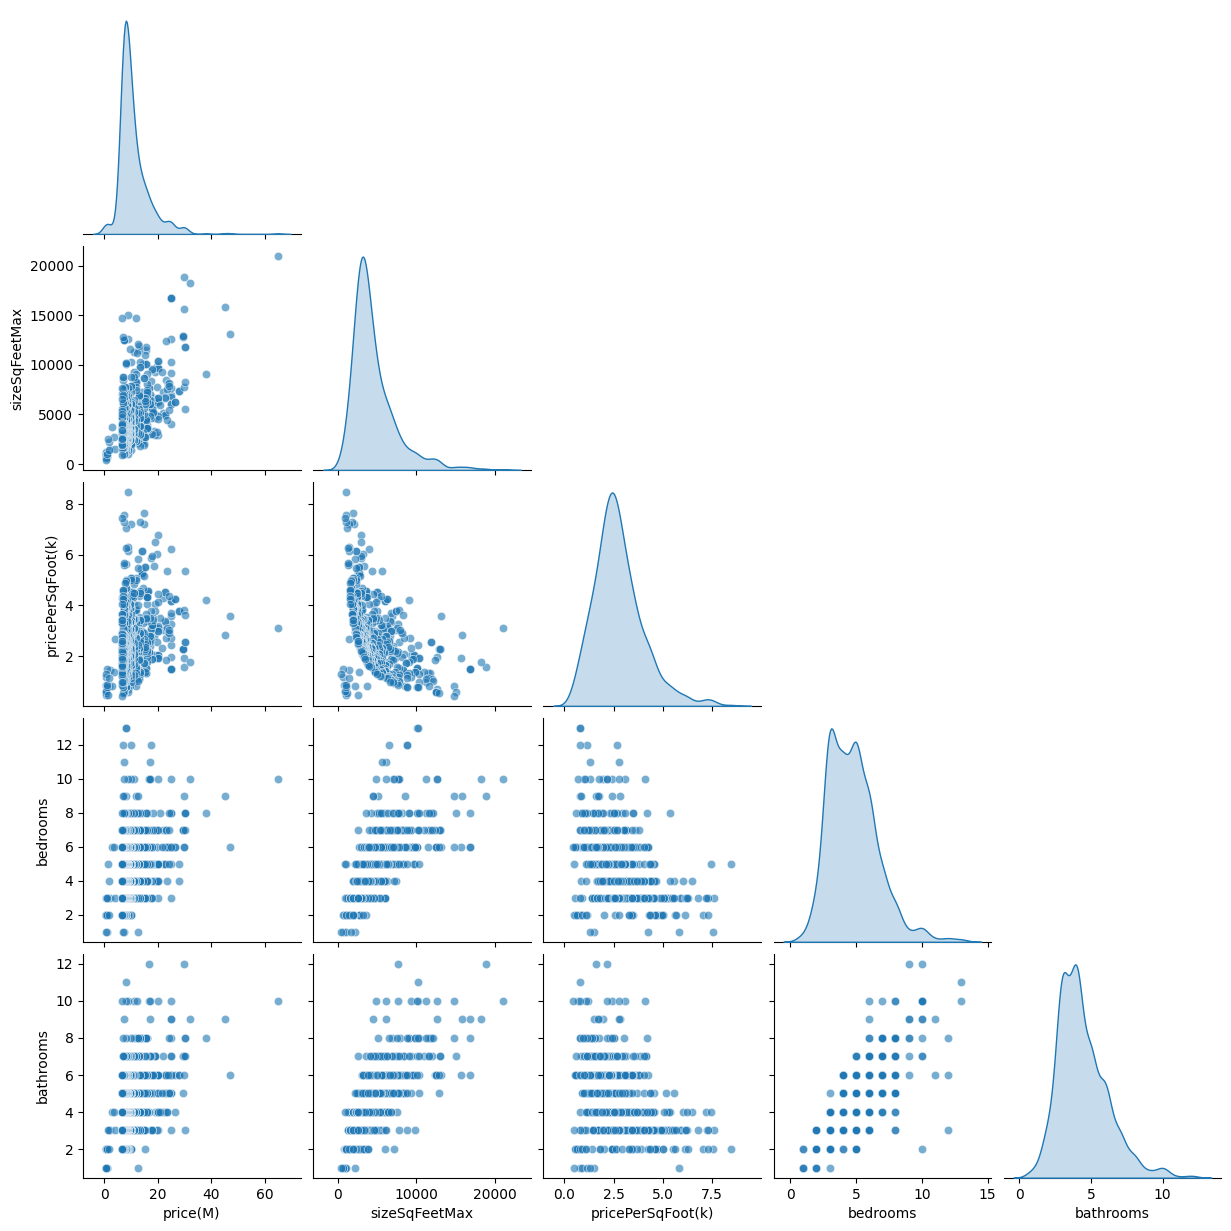

In [188]:
numerical_columns = ['price(M)', 'sizeSqFeetMax', 'pricePerSqFoot(k)', 'bedrooms', 'bathrooms']
sns.pairplot(subset[numerical_columns], diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Numerical Variables', y=1.02, fontsize=16)
plt.show()

## 🏹 Estimación puntual y por intervalos.

### Media poblacional

Estimacion puntual de la media poblacional.

* Del precio de los inmuebles.
* Mediante el uso de la media muestral.

In [189]:
data["price(M)"].mean()

np.float64(11.333113550058894)

Podemos asumir que como la demia de nuestra muestra es 11 millones de libras, la media poblacional de las casas en londres tienen un precio de 11M de libras

### Media poblacional

Estimación de la media poblacional por intervalos de confianza del 95 porciento.

In [192]:
st.t.interval(confidence=0.95, df=len(data["price(M)"])-1, loc=np.mean(data["price(M)"]), scale=st.sem(data["price(M)"]))

(np.float64(10.87792233937227), np.float64(11.788304760745516))

Podemos estar seguros al 95% de probabilidad que la media poblacional del precio de las casas en londres esta entre 10.8 y 11.7 millones de libras.

## 🔮 Hipótesis

### Hipotesis 1

H
1
​
 : La media de los precios de las casas es mayor que la de los pisos ( 𝜇
casas > 𝜇 pisos ).

H
0
​
 : La media de los precios de las casas es menor o igual a la de los pisos ( 𝜇 casas ≤ 𝜇 pisos ).


In [193]:
house_df =  subset[subset['propertyGlobalType'] == "House"]
flat_df =  subset[subset['propertyGlobalType'] == "Flat"]

In [194]:
t_stat, p_value = stats.ttest_ind(house_df["price(M)"], flat_df["price(M)"], alternative='greater', equal_var=False)

print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Podemos afirmar con una seguridad de más del 95% que la media de los precios de las casas es mayor.")
else:
    print("No podemos rechazar la hipótesis nula.")

Estadístico t: 6.059136130387427
Valor p: 1.3228725788820076e-09
Rechazamos la hipótesis nula. Podemos afirmar con una seguridad de más del 95% que la media de los precios de las casas es mayor.



### Hipótesis 2

-h1: la media del precio de las casas < 11M(media muestral)

-h0: la media del precio de las casas => 11M

In [195]:
mi=data["price(M)"].mean() #Media ipotetica

t_stat, p_value = stats.ttest_1samp(house_df["price(M)"], mi)

p_value_unilateral = p_value / 2 if t_stat > 0 else 1 - (p_value / 2)

print(f"Estadístico t: {t_stat}")
print(f"Valor p unilateral: {p_value_unilateral}")

# Interpretación
alpha = 0.05  # Nivel de significancia
if p_value_unilateral < alpha:
    print("Rechazamos la hipótesis nula. Podemos declarar con más del 95% de probabilidad que h1 es cierta.")
else:
    print("No podemos rechazar la hipótesis nula.")

Estadístico t: 2.72268580968217
Valor p unilateral: 0.0034051325964801647
Rechazamos la hipótesis nula. Podemos declarar con más del 95% de probabilidad que h1 es cierta.


#Anova

h1: media precios apartamentos = media precios penthouses = media precios terraced

h0: estas medias son distintas

In [196]:
Apartmente_df =  subset[subset['propertyType'] == "Apartment"]
Penthouse_df =  subset[subset['propertyType'] == "Penthouse"]
Terraced_df =  subset[subset['propertyType'] == "Terraced"]

f_stat, p_value = stats.f_oneway(Apartmente_df["price(M)"], Penthouse_df["price(M)"], Terraced_df["price(M)"]) #f_oneway realiza un ANOVA de una vía.

alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay diferencias significativas entre las medias.")
else:
    print("No podemos rechazar la hipótesis nula. Las medias son estadísticamente iguales.")

Rechazamos la hipótesis nula. Hay diferencias significativas entre las medias.
